In [6]:
import pandas as pd

In [8]:
df=pd.read_csv('Tuition_Assistance.csv')

In [3]:
df.head()

,Department,Major,Degree,School,Course Title,Course Description,Cost
0,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRODUCTION TO BUSINESS,An introductory course designed to survey the ...,392.0
1,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,MA 160,A general calculus course primarily for busine...,392.0
2,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRO TO AMERICAN MUSIC,A survey of American popular music from the tu...,392.0
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),BOWIE STATE UNIVERSITY,PUBLIC POLICY ANALYSIS,Focus is on the analysis of costs and benefits...,1062.0
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),Mount St Mary's University,MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,"The historical, current, and future organizati...",1569.0


In [4]:
df.shape

(4368, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Department          4368 non-null   object 
 1   Major               3883 non-null   object 
 2   Degree              4368 non-null   object 
 3   School              4368 non-null   object 
 4   Course Title        4368 non-null   object 
 5   Course Description  4171 non-null   object 
 6   Cost                4368 non-null   float64
dtypes: float64(1), object(6)
memory usage: 239.0+ KB


In [10]:
df.describe()

,Cost
count,4368.000000
mean,786.263024
std,533.319613
min,0.000000
25%,366.000000
50%,700.000000
75%,1015.000000
max,2300.000000


In [11]:
df.isnull().sum()

Department              0
Major                 485
Degree                  0
School                  0
Course Title            0
Course Description    197
Cost                    0
dtype: int64

In [13]:
m=df.loc[:,['Department','Cost']]

In [14]:
m.shape

(4368, 2)

In [15]:
m.describe()

,Cost
count,4368.000000
mean,786.263024
std,533.319613
min,0.000000
25%,366.000000
50%,700.000000
75%,1015.000000
max,2300.000000


In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cost')

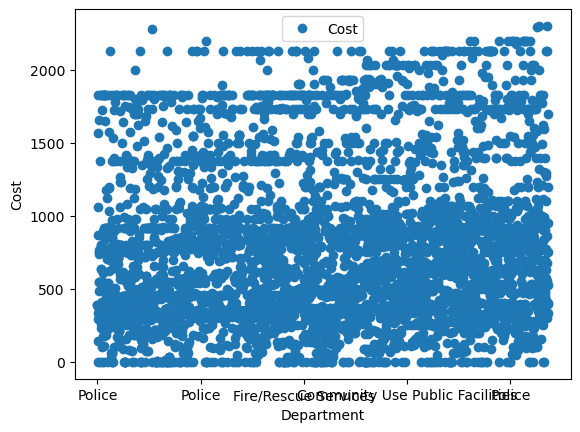

In [17]:
df.plot(x='Department',y='Cost',style='o')
plt.xlabel('Department')
plt.ylabel('Cost')

In [19]:
x=pd.DataFrame(df['Department'])

In [20]:
y=pd.DataFrame(df['Cost'])

In [21]:
x.shape,y.shape

((4368, 1), (4368, 1))

In [22]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [62]:
X_train

,Department
2555,General Services
4269,Fire/Rescue Services
1508,Health & Human Services
3074,Health & Human Services
1946,Liquor Control
...,...
2895,Correction & Rehabilitation
2763,Libraries
905,Police
3980,Police


In [24]:
from sklearn.linear_model import LinearRegression

In [26]:
clf=LinearRegression()


In [63]:
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X_train)
scaled_data
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pc=pca.fit_transform(scaled_data)
pca_df=pd.DataFrame(data=pc,columns=['pc1','pc2'])
pca_df_ex=pca.explained_variance_ratio
pca_df_ex
plt.figure(figsize=(8,6))
plt.scatter(pca_df['pc1'],pca_df['pc2'],c='red')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.grid(True)


ValueError: could not convert string to float: 'General Services'

In [50]:
y_pred=clf.predict(X_test)
y_pred

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [55]:
from sklearn.metrics import r2_score

In [54]:
r2=r2_score(Y_test,y_pred)

NameError: name 'y_pred' is not defined

In [53]:
r2*100

NameError: name 'r2' is not defined